   # YouTube predictive model

## Introduction

***

I want to predict whether I will watch a new video from a channel I subscribe to based on my own YouTube and YouTube Music data (watching history.json and subscriptions.csv). 

**The context**:

When I am not listening to playlists, I either search for music in crowdsource databases and websites (such as Discogs [https://www.discogs.com] - a database of audio recordings), or I listen to songs that the argorithm suggests or I browse channels and their contents.

YouTube Music has the option of giving users recommendations based on the song they have picked to listen (YouTube also has this option, but it gives the user more to pick from, as there is a whole list of recemmendations on the right side of the screen) or to listen to radios that the platform makes, also based on history. These radios have both songs that I have listened to and new songs. 

"The algorithm" has different selection or discovery systems (Cooper, 2021):
- selects videos for the YouTube homepage 
- the one that ranks results for any given search
- one that selects suggested videos for viewers to watch next

The videos get selected for the homepage based on performance and personalisation. Performace refers to click-through rate, average view duration, average percentage viewed, likes, dislikes (data operalisation - i.e., user engagement on the platform). Personalisation refers to the users' past behaviour which feeds the algorithm, the 'watch history', the data I will use to feed my model with. In addition to performace and presonalisation, the algorithm could recommend videos that are watched together by other users, related videos that are on a similar topic, or videos that the user has watched in the past (Cooper, 2021). 
The algorithm that ranks the search results is based on keywords and on performance. The search bar is like a normal search engine, some videos appear higher than others. The performance of the video (click-through rate, watch time, likes, survey feedback, etc.) becomes an important factor in what is showed to the user. If the video the user is watching seems appealing and satisfying to people, then the video will be even higher up the search engine results page (SERP) (Cooper, 2021). 


**Research question**: 

Will I watch a new video from a channel I subscribe to? 

**Practical relevance**:

YouTube is testing out a user interface change - to hide the number of dislikes in a video (Smith, 2021). I am part of the sample. This can influence following the algorithm, i.e. selecting recommended videos. If I see the number of dislikes of a recommended video, I might not watch it. 

However, on YouTube Music the number of likes, dislikes, views or comments are not shown, so there is no influence, the algorithm is on "auto-play". 

User interface is also important in YouTube for how people perceive it. There have been some design changes over the years, and they are always updating and testing it. YouTube interface is adaptable to the user, is customisable in terms of the user profile: the user can choose its name, and can customise its channel appearance (make an identity). Also Youtube's interface is adaptive, and here comes the algorithm which gives personalised content to the user. The platform is intuitive and easy to use. The algorithm is optimised for getting people to engage with the videos, it learns the users behaviour, the longer he/she stays on YouTube the better the algorithm learns its user's behaviour (Cooper, 2021). 

The question is how likely am I to follow this algorithm? Will I rather stick to my subscriptions and watch whatever the channels post? The machine learning model will predict whether I will watch a video I haven't watched before from channels I subscribe to. 
***

### Libraries

In [1]:
import json
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#visualisation 

from sklearn.preprocessing import normalize
#fit data between 0 and 1 

from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix
#metrics 
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#machine learning prediction

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#model selection

from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier.rocauc import roc_auc
#learning and roc curve

#### Data Importing

In [2]:
with open('watch-history.json') as f:
  data = json.load(f)

df = pd.read_json('watch-history.json')

## Data set

***
I have downloaded my YouTube and YouTube Music watching history and subscription data from 2017 onwards until the 31st of December 2021. Initially there were some data from 2022, but I cleaned them. There are 26798 lines. The watching history was downloaded as a JSON file, the channels I subscribe to as a csv file. The data came for both platform under the same JSON file. 

I want to predict the dependent variable, watched before (yes/no), which is dependent on the independent variables: time, time of day (morning, evening, night), date, URL, channel URL, subscribed (yes/no), 
***

## Data cleaning & Feature Engineering

***
I will start cleaning the raw data and explain which transformations I have made to the variables in order to make them more informative. 
***

In [3]:
df

,header,title,titleUrl,subtitles,time,products,activityControls,description
0,YouTube Music,Watched Right In Two,https://www.youtube.com/watch?v=Wh1yB_MF7ck,"[{'name': 'TOOL - Topic', 'url': 'https://www....",2022-01-03T09:08:41.895Z,[YouTube],[YouTube watch history],NaN
1,YouTube Music,Watched Wake Up,https://www.youtube.com/watch?v=cCiFloUKUBs,"[{'name': 'Mad Season - Topic', 'url': 'https:...",2022-01-03T09:01:04.900Z,[YouTube],[YouTube watch history],NaN
2,YouTube Music,Watched Long Gone Day,https://www.youtube.com/watch?v=-1RdXVQN4ag,"[{'name': 'Mad Season - Topic', 'url': 'https:...",2022-01-03T08:56:14.686Z,[YouTube],[YouTube watch history],NaN
3,YouTube,Visited YouTube Music,NaN,[{'name': 'Served location-based recommendatio...,2022-01-03T08:50:50.707Z,[YouTube],[YouTube watch history],NaN
4,YouTube,Visited YouTube Music,NaN,[{'name': 'Served location-based recommendatio...,2022-01-03T08:50:50.185Z,[YouTube],[YouTube watch history],NaN
...,...,...,...,...,...,...,...,...
28996,YouTube,Watched Alaska - The vortex,https://www.youtube.com/watch?v=VT06bwXaYI0,"[{'name': 'BillyDrum7', 'url': 'https://www.yo...",2017-06-07T11:51:11.202Z,[YouTube],[YouTube watch history],NaN
28997,YouTube,Watched Lynx - The Gift (feat. Zero One),https://www.youtube.com/watch?v=FyUHeq85gwI,"[{'name': 'Hospital Records', 'url': 'https://...",2017-06-07T11:48:32.212Z,[YouTube],[YouTube watch history],NaN
28998,YouTube,Watched MY NU LENG in The Lab LDN,https://www.youtube.com/watch?v=1h-IWQNwfCY,"[{'name': 'Mixmag', 'url': 'https://www.youtub...",2017-06-07T11:36:27.208Z,[YouTube],[YouTube watch history],NaN
28999,YouTube,Watched My Nu Leng live at Leeds Festival 2016...,https://www.youtube.com/watch?v=mwutn1Mo4hU,"[{'name': 'rockeeben', 'url': 'https://www.you...",2017-06-07T11:36:11.520Z,[YouTube],[YouTube watch history],NaN


It seems like I would need the 'url', 'subtitles' which contains the name and url of the channel, the 'time and date'.

#### Dropping irrelevant columns
The 'subtitles' column consists of a list of dictionaries and I must split all it's components. 

In [4]:
df_new = df[['titleUrl', 'title', 'time', 'subtitles']].dropna().reset_index(drop=True)
df_new.head()

,titleUrl,title,time,subtitles
0,https://www.youtube.com/watch?v=Wh1yB_MF7ck,Watched Right In Two,2022-01-03T09:08:41.895Z,"[{'name': 'TOOL - Topic', 'url': 'https://www...."
1,https://www.youtube.com/watch?v=cCiFloUKUBs,Watched Wake Up,2022-01-03T09:01:04.900Z,"[{'name': 'Mad Season - Topic', 'url': 'https:..."
2,https://www.youtube.com/watch?v=-1RdXVQN4ag,Watched Long Gone Day,2022-01-03T08:56:14.686Z,"[{'name': 'Mad Season - Topic', 'url': 'https:..."
3,https://www.youtube.com/watch?v=0v8Q9q5XJ_c,Watched Quant - Tik Tok [2000],2022-01-03T08:48:55.328Z,"[{'name': 'Back Lighting', 'url': 'https://www..."
4,https://www.youtube.com/watch?v=yepJcWpDMLE,Watched A1. Dj Octopus - Howl 14.1 [HOWL014],2022-01-03T08:48:24.465Z,"[{'name': 'YY.', 'url': 'https://www.youtube.c..."


The explode function transforms each element of a list-like to a row, reindexing values (this counts as feature engineering). 

In [5]:
df_new = df_new.explode('subtitles')
df_new = df_new.join(pd.json_normalize(df_new.subtitles)).drop(columns = ['subtitles'])
df_new = df_new.rename(columns={'name': 'channel'})
df_new = df_new.rename(columns={'titleUrl': 'URL'})
df_new = df_new.rename(columns={'url': 'channel_URL'})
df_new

,URL,title,time,channel,channel_URL
0,https://www.youtube.com/watch?v=Wh1yB_MF7ck,Watched Right In Two,2022-01-03T09:08:41.895Z,TOOL - Topic,https://www.youtube.com/channel/UCW6FSIkA04g7p...
1,https://www.youtube.com/watch?v=cCiFloUKUBs,Watched Wake Up,2022-01-03T09:01:04.900Z,Mad Season - Topic,https://www.youtube.com/channel/UC7ux4ID-Qzqqz...
2,https://www.youtube.com/watch?v=-1RdXVQN4ag,Watched Long Gone Day,2022-01-03T08:56:14.686Z,Mad Season - Topic,https://www.youtube.com/channel/UC7ux4ID-Qzqqz...
3,https://www.youtube.com/watch?v=0v8Q9q5XJ_c,Watched Quant - Tik Tok [2000],2022-01-03T08:48:55.328Z,Back Lighting,https://www.youtube.com/channel/UC8sSCDtDP1Q0Q...
4,https://www.youtube.com/watch?v=yepJcWpDMLE,Watched A1. Dj Octopus - Howl 14.1 [HOWL014],2022-01-03T08:48:24.465Z,YY.,https://www.youtube.com/channel/UCtSYkZGP9nkvX...
...,...,...,...,...,...
26806,https://www.youtube.com/watch?v=N9_Y_uoPcXM,Watched Dom & Roland - Jungle Beast,2017-06-07T11:59:37.382Z,sashaaR,https://www.youtube.com/channel/UC2Axbk7UhhKjB...
26807,https://www.youtube.com/watch?v=VT06bwXaYI0,Watched Alaska - The vortex,2017-06-07T11:51:11.202Z,BillyDrum7,https://www.youtube.com/channel/UCAojWHZN3xvpC...
26808,https://www.youtube.com/watch?v=FyUHeq85gwI,Watched Lynx - The Gift (feat. Zero One),2017-06-07T11:48:32.212Z,Hospital Records,https://www.youtube.com/channel/UCw49uOTAJjGUd...
26809,https://www.youtube.com/watch?v=1h-IWQNwfCY,Watched MY NU LENG in The Lab LDN,2017-06-07T11:36:27.208Z,Mixmag,https://www.youtube.com/channel/UCQdCIrTpkhEH5...


#### Creating new columns based on time variable

In [6]:
df_new['date'] = pd.to_datetime(df['time']).dt.date
df_new['time'] = pd.to_datetime(df['time']).dt.time
df_new['time'] = df_new['time'].astype(str) 
df_new['time'] = df_new['time'].str.split(':').str[0] + ':' +  df_new['time'].str.split(':').str[1] + ':' + df_new['time'].str.split(':').str[2].str[:2]
df_new['date'] = pd.to_datetime(df_new['date'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')
df_new['date'] = pd.to_datetime(df_new['date'])
df_new

,URL,title,time,channel,channel_URL,date
0,https://www.youtube.com/watch?v=Wh1yB_MF7ck,Watched Right In Two,09:08:41,TOOL - Topic,https://www.youtube.com/channel/UCW6FSIkA04g7p...,2022-03-01
1,https://www.youtube.com/watch?v=cCiFloUKUBs,Watched Wake Up,09:01:04,Mad Season - Topic,https://www.youtube.com/channel/UC7ux4ID-Qzqqz...,2022-03-01
2,https://www.youtube.com/watch?v=-1RdXVQN4ag,Watched Long Gone Day,08:56:14,Mad Season - Topic,https://www.youtube.com/channel/UC7ux4ID-Qzqqz...,2022-03-01
3,https://www.youtube.com/watch?v=0v8Q9q5XJ_c,Watched Quant - Tik Tok [2000],08:50:50,Back Lighting,https://www.youtube.com/channel/UC8sSCDtDP1Q0Q...,2022-03-01
4,https://www.youtube.com/watch?v=yepJcWpDMLE,Watched A1. Dj Octopus - Howl 14.1 [HOWL014],08:50:50,YY.,https://www.youtube.com/channel/UCtSYkZGP9nkvX...,2022-03-01
...,...,...,...,...,...,...
26806,https://www.youtube.com/watch?v=N9_Y_uoPcXM,Watched Dom & Roland - Jungle Beast,21:31:45,sashaaR,https://www.youtube.com/channel/UC2Axbk7UhhKjB...,2017-01-12
26807,https://www.youtube.com/watch?v=VT06bwXaYI0,Watched Alaska - The vortex,21:31:05,BillyDrum7,https://www.youtube.com/channel/UCAojWHZN3xvpC...,2017-01-12
26808,https://www.youtube.com/watch?v=FyUHeq85gwI,Watched Lynx - The Gift (feat. Zero One),21:24:14,Hospital Records,https://www.youtube.com/channel/UCw49uOTAJjGUd...,2017-01-12
26809,https://www.youtube.com/watch?v=1h-IWQNwfCY,Watched MY NU LENG in The Lab LDN,21:21:08,Mixmag,https://www.youtube.com/channel/UCQdCIrTpkhEH5...,2017-01-12


#### Creating 'day of week' column
I want to add the 'day of the week' as a variable and check later in the 'data analysis' section if it is a relevant variable for the selected prediction model.

In [7]:
df_new['day_of_week'] = df_new['date'].dt.dayofweek
df_new

,URL,title,time,channel,channel_URL,date,day_of_week
0,https://www.youtube.com/watch?v=Wh1yB_MF7ck,Watched Right In Two,09:08:41,TOOL - Topic,https://www.youtube.com/channel/UCW6FSIkA04g7p...,2022-03-01,1
1,https://www.youtube.com/watch?v=cCiFloUKUBs,Watched Wake Up,09:01:04,Mad Season - Topic,https://www.youtube.com/channel/UC7ux4ID-Qzqqz...,2022-03-01,1
2,https://www.youtube.com/watch?v=-1RdXVQN4ag,Watched Long Gone Day,08:56:14,Mad Season - Topic,https://www.youtube.com/channel/UC7ux4ID-Qzqqz...,2022-03-01,1
3,https://www.youtube.com/watch?v=0v8Q9q5XJ_c,Watched Quant - Tik Tok [2000],08:50:50,Back Lighting,https://www.youtube.com/channel/UC8sSCDtDP1Q0Q...,2022-03-01,1
4,https://www.youtube.com/watch?v=yepJcWpDMLE,Watched A1. Dj Octopus - Howl 14.1 [HOWL014],08:50:50,YY.,https://www.youtube.com/channel/UCtSYkZGP9nkvX...,2022-03-01,1
...,...,...,...,...,...,...,...
26806,https://www.youtube.com/watch?v=N9_Y_uoPcXM,Watched Dom & Roland - Jungle Beast,21:31:45,sashaaR,https://www.youtube.com/channel/UC2Axbk7UhhKjB...,2017-01-12,3
26807,https://www.youtube.com/watch?v=VT06bwXaYI0,Watched Alaska - The vortex,21:31:05,BillyDrum7,https://www.youtube.com/channel/UCAojWHZN3xvpC...,2017-01-12,3
26808,https://www.youtube.com/watch?v=FyUHeq85gwI,Watched Lynx - The Gift (feat. Zero One),21:24:14,Hospital Records,https://www.youtube.com/channel/UCw49uOTAJjGUd...,2017-01-12,3
26809,https://www.youtube.com/watch?v=1h-IWQNwfCY,Watched MY NU LENG in The Lab LDN,21:21:08,Mixmag,https://www.youtube.com/channel/UCQdCIrTpkhEH5...,2017-01-12,3


In [8]:
df_new = df_new[['URL', 'title', 'time', 'date', 'channel', 'channel_URL', 'day_of_week']]
df_new = df_new.drop([0,1,2,3,4,5,6,7,8,9,10,11,12])
#removed the lines from 2022 so the data has a clear time frame
df_new.head()

,URL,title,time,date,channel,channel_URL,day_of_week
13,https://www.youtube.com/watch?v=o-7ZZIqWjoU,Watched Are You That Somebody,22:22:12,2021-12-31,Aaliyah - Topic,https://www.youtube.com/channel/UC5tUz7LmavHn9...,4
14,https://www.youtube.com/watch?v=tv_BPYXDwmc,Watched Smack That,22:21:46,2021-12-31,Akon - Topic,https://www.youtube.com/channel/UCRWV7T1N1UFFY...,4
15,https://www.youtube.com/watch?v=jAC2xmQ-3Ok,Watched Glamorous,22:10:36,2021-12-31,Fergie - Topic,https://www.youtube.com/channel/UCmla6CSfrh4N8...,4
16,https://www.youtube.com/watch?v=g_V6wqBlADw,Watched SexyBack,22:06:11,2021-12-31,Justin Timberlake - Topic,https://www.youtube.com/channel/UC6VwktUsQQDCk...,4
17,https://www.youtube.com/watch?v=rDBck1REfBc,Watched Don't Cha,22:02:38,2021-12-31,The Pussycat Dolls - Topic,https://www.youtube.com/channel/UCRjEjH_Xj7sQN...,4


#### Creating 'part of day' column

This funtion will get the 'part of the day' column and will check later in the 'data analysis' section if it is a relevant variable for the selected prediction model. This counts as a feature engineering. 

In [9]:
def get_part_of_day(time):
    h = int(time[:2])
    return (
        "morning"
        if 5 <= h <= 11
        else "afternoon"
        if 12 <= h <= 17
        else "evening"
        if 18 <= h <= 22
        else "night"
    )

df_new['part_of_day'] = df_new['time'].apply(get_part_of_day)
df_new.head()

,URL,title,time,date,channel,channel_URL,day_of_week,part_of_day
13,https://www.youtube.com/watch?v=o-7ZZIqWjoU,Watched Are You That Somebody,22:22:12,2021-12-31,Aaliyah - Topic,https://www.youtube.com/channel/UC5tUz7LmavHn9...,4,evening
14,https://www.youtube.com/watch?v=tv_BPYXDwmc,Watched Smack That,22:21:46,2021-12-31,Akon - Topic,https://www.youtube.com/channel/UCRWV7T1N1UFFY...,4,evening
15,https://www.youtube.com/watch?v=jAC2xmQ-3Ok,Watched Glamorous,22:10:36,2021-12-31,Fergie - Topic,https://www.youtube.com/channel/UCmla6CSfrh4N8...,4,evening
16,https://www.youtube.com/watch?v=g_V6wqBlADw,Watched SexyBack,22:06:11,2021-12-31,Justin Timberlake - Topic,https://www.youtube.com/channel/UC6VwktUsQQDCk...,4,evening
17,https://www.youtube.com/watch?v=rDBck1REfBc,Watched Don't Cha,22:02:38,2021-12-31,The Pussycat Dolls - Topic,https://www.youtube.com/channel/UCRjEjH_Xj7sQN...,4,evening


#### Creating 'Weekend / Weekday' column

I added the 'weekend weekday' as a variable and will check later in the 'data analysis' section if it is a relevant variable for the selected prediction model. This counts as a feature engineering.

In [10]:
df_new['weekday_weekend'] = np.where(df_new['day_of_week']>4, 'weekend', 'weekday')

#### Creating my y variable - 'watched before' column 

Checked the occurences of the URL and then grouped them in a dictionary and did a dictionary comprehension. Then the 'map' function was used to add the column to the data frame. This counts as a feature engineering. 

In [11]:
url_occurences = df_new.groupby(['URL']).size().to_dict()

url_watchedbefore = {url: int(watched > 1) for (url, watched) in url_occurences.items()}
#dictionary comprehension
#1 if watched > 1 else 0

df_new['watched_before'] = df_new['URL'].map(url_watchedbefore)

#### Creating 'hour' column

I added the 'hour' as a variable from the 'time' column and will check later in the 'data analysis' section if it is a relevant variable for the selected prediction model. 

In [12]:
df_new['time'] = pd.to_datetime(df_new['time']) #tranform the format back to datetime to retrieve the hour

df_new['hour'] = df_new['time'].dt.hour
df_new['time'] = df_new['time'].astype(str) 
df_new['time'] = df_new['time'].str.split(':').str[0] + ':' +  df_new['time'].str.split(':').str[1] + ':' + df_new['time'].str.split(':').str[2].str[:2]
df_new['time'] = pd.to_datetime(df['time']).dt.time
df_new['time'] = df_new['time'].astype(str) 
df_new['time'] = df_new['time'].str.split(':').str[0] + ':' +  df_new['time'].str.split(':').str[1] + ':' + df_new['time'].str.split(':').str[2].str[:2]
df_new

,URL,title,time,date,channel,channel_URL,day_of_week,part_of_day,weekday_weekend,watched_before,hour
13,https://www.youtube.com/watch?v=o-7ZZIqWjoU,Watched Are You That Somebody,22:22:12,2021-12-31,Aaliyah - Topic,https://www.youtube.com/channel/UC5tUz7LmavHn9...,4,evening,weekday,0,22
14,https://www.youtube.com/watch?v=tv_BPYXDwmc,Watched Smack That,22:21:46,2021-12-31,Akon - Topic,https://www.youtube.com/channel/UCRWV7T1N1UFFY...,4,evening,weekday,0,22
15,https://www.youtube.com/watch?v=jAC2xmQ-3Ok,Watched Glamorous,22:10:36,2021-12-31,Fergie - Topic,https://www.youtube.com/channel/UCmla6CSfrh4N8...,4,evening,weekday,0,22
16,https://www.youtube.com/watch?v=g_V6wqBlADw,Watched SexyBack,22:06:11,2021-12-31,Justin Timberlake - Topic,https://www.youtube.com/channel/UC6VwktUsQQDCk...,4,evening,weekday,0,22
17,https://www.youtube.com/watch?v=rDBck1REfBc,Watched Don't Cha,22:02:38,2021-12-31,The Pussycat Dolls - Topic,https://www.youtube.com/channel/UCRjEjH_Xj7sQN...,4,evening,weekday,0,22
...,...,...,...,...,...,...,...,...,...,...,...
26806,https://www.youtube.com/watch?v=N9_Y_uoPcXM,Watched Dom & Roland - Jungle Beast,21:31:45,2017-01-12,sashaaR,https://www.youtube.com/channel/UC2Axbk7UhhKjB...,3,evening,weekday,1,21
26807,https://www.youtube.com/watch?v=VT06bwXaYI0,Watched Alaska - The vortex,21:31:05,2017-01-12,BillyDrum7,https://www.youtube.com/channel/UCAojWHZN3xvpC...,3,evening,weekday,1,21
26808,https://www.youtube.com/watch?v=FyUHeq85gwI,Watched Lynx - The Gift (feat. Zero One),21:24:14,2017-01-12,Hospital Records,https://www.youtube.com/channel/UCw49uOTAJjGUd...,3,evening,weekday,1,21
26809,https://www.youtube.com/watch?v=1h-IWQNwfCY,Watched MY NU LENG in The Lab LDN,21:21:08,2017-01-12,Mixmag,https://www.youtube.com/channel/UCQdCIrTpkhEH5...,3,evening,weekday,0,21


In [13]:
df_new['watched_before'].value_counts()

1    16847
0     9951
Name: watched_before, dtype: int64

***
Based on this, there are enough rows for both Yes and No instances for the 'watched before' column. Also given that I have more rows with videos that I watched before, there is a chance of a significant result in the prediction. 
***

#### Importing the subscriptions csv

***
Now I will import the 'subscriptions' csv file to take the channel URL and see whether I subscribe the particular channel or not.
***

In [14]:
df02 = pd.read_csv("subscriptions.csv")
df02 = df02.rename(columns={'Channel Url': 'channel_URL'})
df02 = df02.drop(columns=['Channel Id'])
df02.head()

,channel_URL,Channel Title
0,http://www.youtube.com/channel/UC1F4hqs2a3j3sj...,Crobot Muzik
1,http://www.youtube.com/channel/UC1LDAOvNSg2Kw0...,Phunk_sub
2,http://www.youtube.com/channel/UC1VMyij8HxEoga...,D K
3,http://www.youtube.com/channel/UC1bk1WWjSynNAS...,Kerouac&SMILE Music
4,http://www.youtube.com/channel/UC1raAF6N6U-9cT...,The MUDD Show


In [15]:
df_new = df_new.rename(columns={'channel_URL': 'channel_id'})
df02 = df02.rename(columns={'channel_URL': 'channel_id'})

df_new['channel_id'] = df_new['channel_id'].str.split('/').str[-1]
df02['channel_id'] = df02['channel_id'].str.split('/').str[-1]

The url links are different, some are with 'http' and some are with 'https' so merging the 2 files on the same column would not have been possible. 

In [16]:
df_new = df_new.merge(df02, how='left', on='channel_id', indicator='subscribed')
df_new

,URL,title,time,date,channel,channel_id,day_of_week,part_of_day,weekday_weekend,watched_before,hour,Channel Title,subscribed
0,https://www.youtube.com/watch?v=o-7ZZIqWjoU,Watched Are You That Somebody,22:22:12,2021-12-31,Aaliyah - Topic,UC5tUz7LmavHn9NOM4Nn3wxQ,4,evening,weekday,0,22,NaN,left_only
1,https://www.youtube.com/watch?v=tv_BPYXDwmc,Watched Smack That,22:21:46,2021-12-31,Akon - Topic,UCRWV7T1N1UFFYsiiEAoUbFw,4,evening,weekday,0,22,NaN,left_only
2,https://www.youtube.com/watch?v=jAC2xmQ-3Ok,Watched Glamorous,22:10:36,2021-12-31,Fergie - Topic,UCmla6CSfrh4N8uip10t-YPw,4,evening,weekday,0,22,NaN,left_only
3,https://www.youtube.com/watch?v=g_V6wqBlADw,Watched SexyBack,22:06:11,2021-12-31,Justin Timberlake - Topic,UC6VwktUsQQDCkHG1h6YftAQ,4,evening,weekday,0,22,NaN,left_only
4,https://www.youtube.com/watch?v=rDBck1REfBc,Watched Don't Cha,22:02:38,2021-12-31,The Pussycat Dolls - Topic,UCRjEjH_Xj7sQNJ9A_RU-RiA,4,evening,weekday,0,22,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26793,https://www.youtube.com/watch?v=N9_Y_uoPcXM,Watched Dom & Roland - Jungle Beast,21:31:45,2017-01-12,sashaaR,UC2Axbk7UhhKjB7yWWlF68pw,3,evening,weekday,1,21,NaN,left_only
26794,https://www.youtube.com/watch?v=VT06bwXaYI0,Watched Alaska - The vortex,21:31:05,2017-01-12,BillyDrum7,UCAojWHZN3xvpCrl7SNAOaZg,3,evening,weekday,1,21,NaN,left_only
26795,https://www.youtube.com/watch?v=FyUHeq85gwI,Watched Lynx - The Gift (feat. Zero One),21:24:14,2017-01-12,Hospital Records,UCw49uOTAJjGUdoAeUcp7tOg,3,evening,weekday,1,21,NaN,left_only
26796,https://www.youtube.com/watch?v=1h-IWQNwfCY,Watched MY NU LENG in The Lab LDN,21:21:08,2017-01-12,Mixmag,UCQdCIrTpkhEH5Z8KPsn7NvQ,3,evening,weekday,0,21,NaN,left_only


#### Creating 'Subscribed' column
The 'subscribed' column has the 'left only' value which means that I haven't subscribed to the channel. Below I am organising the data in the column to have 0 (not subscribed) and 1 (subscribed) values. 

In [17]:
df_new['subscribed'] = df_new['subscribed'].apply(lambda x:0 if x == 'left_only' else 1)
df_new = df_new.drop(columns=['Channel Title'])
#dropped this column as it is redundant

In [18]:
df_new.columns

Index(['URL', 'title', 'time', 'date', 'channel', 'channel_id', 'day_of_week',
       'part_of_day', 'weekday_weekend', 'watched_before', 'hour',
       'subscribed'],
      dtype='object')

In [19]:
df = df_new[['URL', 'time', 'hour', 'date', 'channel', 'channel_id', 'part_of_day', 'day_of_week', 'weekday_weekend', 'subscribed', 'watched_before' ]]
df.head()

,URL,time,hour,date,channel,channel_id,part_of_day,day_of_week,weekday_weekend,subscribed,watched_before
0,https://www.youtube.com/watch?v=o-7ZZIqWjoU,22:22:12,22,2021-12-31,Aaliyah - Topic,UC5tUz7LmavHn9NOM4Nn3wxQ,evening,4,weekday,0,0
1,https://www.youtube.com/watch?v=tv_BPYXDwmc,22:21:46,22,2021-12-31,Akon - Topic,UCRWV7T1N1UFFYsiiEAoUbFw,evening,4,weekday,0,0
2,https://www.youtube.com/watch?v=jAC2xmQ-3Ok,22:10:36,22,2021-12-31,Fergie - Topic,UCmla6CSfrh4N8uip10t-YPw,evening,4,weekday,0,0
3,https://www.youtube.com/watch?v=g_V6wqBlADw,22:06:11,22,2021-12-31,Justin Timberlake - Topic,UC6VwktUsQQDCkHG1h6YftAQ,evening,4,weekday,0,0
4,https://www.youtube.com/watch?v=rDBck1REfBc,22:02:38,22,2021-12-31,The Pussycat Dolls - Topic,UCRjEjH_Xj7sQNJ9A_RU-RiA,evening,4,weekday,0,0


#### Creating channel occurrences column
I want to calculate the channel occurences - how many times I have watched a video from that particular channel.

In [20]:
#occur refers to channel occurrences - how many times I have watched videos from that channel.
df['occur'] = df['channel'].apply(lambda x: (df['channel'] == x).sum())


In [21]:
df['occur'].describe([0.01,0.05,0.10,0.20,0.25,0.30,0.35,0.40,0.60,0.70,0.80,0.90,0.95,0.99])

count    26798.000000
mean       126.954698
std        196.279960
min          1.000000
1%           1.000000
5%           1.000000
10%          1.000000
20%          4.000000
25%          7.000000
30%         10.000000
35%         13.000000
40%         19.000000
50%         30.000000
60%         53.000000
70%        114.000000
80%        209.000000
90%        463.000000
95%        649.000000
99%        740.000000
max        740.000000
Name: occur, dtype: float64

#### Creating classes of occurrence column
From the descriptive visualisation of the 'occur' table, I can see that there are certain differences in the frequency of watching videos from the same channel. I think that all occurrences may be important for the machine learning model. (Actually did remove some values before, those smaller than 15 and different from 1, and the data was overfit, meaning that the training data was modelled too well. Therefore I am keeping all the data) 

I am transforming the occurrence into a categorical variable and will check later in the 'data analysis' section if it is a relevant variable for the selected prediction model. 

The frequency adverbs (rarely, often, etc.) were chosen based on the Grammar (2022) website. 

In [22]:
conditions = [(df['occur'] < 30), (df['occur'] >= 30) & (df['occur'] < 100),
              (df['occur'] >= 100) & (df['occur'] < 200), (df['occur'] >= 200)& (df['occur']<400),
             (df['occur']>=400)]
values = ['Rarely Visited', 'Occasionally Visited', 'Often Visited', 'Regularly Visited','Usually Visited']
df['occur_classes'] = np.select(conditions, values)
df

,URL,time,hour,date,channel,channel_id,part_of_day,day_of_week,weekday_weekend,subscribed,watched_before,occur,occur_classes
0,https://www.youtube.com/watch?v=o-7ZZIqWjoU,22:22:12,22,2021-12-31,Aaliyah - Topic,UC5tUz7LmavHn9NOM4Nn3wxQ,evening,4,weekday,0,0,1,Rarely Visited
1,https://www.youtube.com/watch?v=tv_BPYXDwmc,22:21:46,22,2021-12-31,Akon - Topic,UCRWV7T1N1UFFYsiiEAoUbFw,evening,4,weekday,0,0,1,Rarely Visited
2,https://www.youtube.com/watch?v=jAC2xmQ-3Ok,22:10:36,22,2021-12-31,Fergie - Topic,UCmla6CSfrh4N8uip10t-YPw,evening,4,weekday,0,0,1,Rarely Visited
3,https://www.youtube.com/watch?v=g_V6wqBlADw,22:06:11,22,2021-12-31,Justin Timberlake - Topic,UC6VwktUsQQDCkHG1h6YftAQ,evening,4,weekday,0,0,2,Rarely Visited
4,https://www.youtube.com/watch?v=rDBck1REfBc,22:02:38,22,2021-12-31,The Pussycat Dolls - Topic,UCRjEjH_Xj7sQNJ9A_RU-RiA,evening,4,weekday,0,0,1,Rarely Visited
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26793,https://www.youtube.com/watch?v=N9_Y_uoPcXM,21:31:45,21,2017-01-12,sashaaR,UC2Axbk7UhhKjB7yWWlF68pw,evening,3,weekday,0,1,16,Rarely Visited
26794,https://www.youtube.com/watch?v=VT06bwXaYI0,21:31:05,21,2017-01-12,BillyDrum7,UCAojWHZN3xvpCrl7SNAOaZg,evening,3,weekday,0,1,5,Rarely Visited
26795,https://www.youtube.com/watch?v=FyUHeq85gwI,21:24:14,21,2017-01-12,Hospital Records,UCw49uOTAJjGUdoAeUcp7tOg,evening,3,weekday,0,1,35,Occasionally Visited
26796,https://www.youtube.com/watch?v=1h-IWQNwfCY,21:21:08,21,2017-01-12,Mixmag,UCQdCIrTpkhEH5Z8KPsn7NvQ,evening,3,weekday,0,0,5,Rarely Visited


***
`This is the final Data Frame`
***

## Data analysis

#### Distribution of categorical variables

In [23]:
categ_vrbls=['watched_before','subscribed','part_of_day','day_of_week','weekday_weekend','occur_classes']

for each in categ_vrbls:
    print('###Ratio_of_occurrance###')
    print(df[each].value_counts(normalize=True),end='\n\n\n')

###Ratio_of_occurrance###
1    0.628666
0    0.371334
Name: watched_before, dtype: float64


###Ratio_of_occurrance###
0    0.625793
1    0.374207
Name: subscribed, dtype: float64


###Ratio_of_occurrance###
afternoon    0.376147
morning      0.287111
evening      0.286178
night        0.050563
Name: part_of_day, dtype: float64


###Ratio_of_occurrance###
4    0.149974
6    0.149526
0    0.148183
2    0.147772
1    0.140346
5    0.132958
3    0.131241
Name: day_of_week, dtype: float64


###Ratio_of_occurrance###
weekday    0.717516
weekend    0.282484
Name: weekday_weekend, dtype: float64


###Ratio_of_occurrance###
Rarely Visited          0.492798
Occasionally Visited    0.184305
Usually Visited         0.111949
Often Visited           0.111277
Regularly Visited       0.099672
Name: occur_classes, dtype: float64




***
Looking at the distribution of the variables across I can observe:
- there are enough Y/N instances for the y variable
- there are more videos I watch from channels I subscribe to
- afternoons have the highest percentage, with mornings and evenings at the same percentage, while at night it seems I don't use YouTube as much (as it is expected)
- the urls are pretty evenly distributed on each day of the week, hence there is an even distribution in the weekday-weekend variable
***

In [24]:
pd.crosstab(df['watched_before'], df['part_of_day'], normalize="columns")

part_of_day,afternoon,evening,morning,night
watched_before,,,,
0,0.363095,0.361325,0.390564,0.380074
1,0.636905,0.638675,0.609436,0.619926


As observed above in the distribution of the variables, afternoons have a slightly higher percentage, which means that I watch more videos in the afternoons. However, it doesn't seem too important as the differences are quite small. 

In [25]:
pd.crosstab(df['watched_before'], df['day_of_week'], normalize="columns")

day_of_week,0,1,2,3,4,5,6
watched_before,,,,,,,
0,0.388567,0.36134,0.382828,0.384134,0.344862,0.3643,0.373846
1,0.611433,0.63866,0.617172,0.615866,0.655138,0.6357,0.626154


Pretty equally distributed

In [26]:
df.corr()

,hour,day_of_week,subscribed,watched_before,occur
hour,1.000000,0.002358,0.002605,0.021179,-0.033985
day_of_week,0.002358,1.000000,0.008932,0.011560,0.006135
subscribed,0.002605,0.008932,1.000000,0.110401,0.638723
watched_before,0.021179,0.011560,0.110401,1.000000,0.130153
occur,-0.033985,0.006135,0.638723,0.130153,1.000000


The numerical variables don't have over-correlation between them. The 'occur' and 'subscribe' variables have a correlation coefficient of 0.638, which is quite high. It makes sense - if I subscribe to the channel, I am more likely to watch videos I haven't watched before from the channel. These seem like the most logical variables that will give some prediction. 

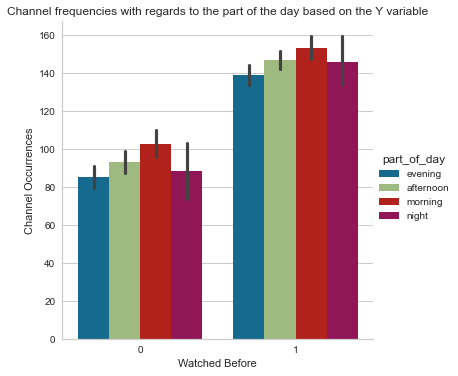

In [27]:
sns.catplot(x="watched_before", y="occur", hue="part_of_day", kind="bar", data=df)
plt.ylabel('Channel Occurrences')
plt.xlabel('Watched Before')
plt.title('Channel frequencies with regards to the part of the day based on the Y variable')
plt.show()

This catplot shows that mornings are when I watch something new regardless if I watched the video before or not. However, here there might be a connection to whether I subscribe to the channel. If I see a video from a channel I subscribe to, I might watch it.

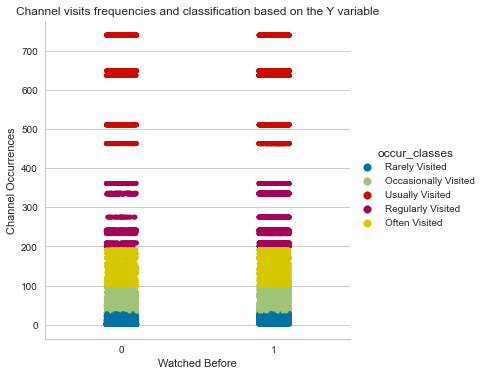

In [28]:
sns.catplot(x="watched_before", y='occur', hue="occur_classes", data=df)
plt.xlabel('Watched Before')
plt.ylabel('Channel Occurrences')
plt.title('Channel visits frequencies and classification based on the Y variable')
plt.show()

This plot shows similarities of channel frequency occurrences both for watched or not watched videos. 


Further, I will inspect the data with regards to the 'subscribed' variable, as shows the highest correlation with the 'occur' variable. 

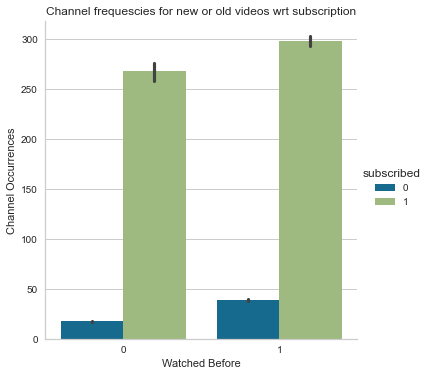

In [29]:
sns.catplot(x="watched_before", y="occur", hue="subscribed", kind="bar", data=df)
plt.ylabel('Channel Occurrences')
plt.xlabel('Watched Before')
plt.title('Channel frequescies for new or old videos wrt subscription')
plt.show()

When subscribed to the channel I would watch both old and new videos. 
If not subscribed, I would still watch new and old, but I am probably not as interested in the channel. This will be reflected later when the model is fitted. 

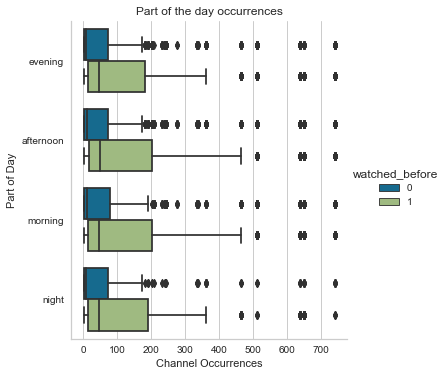

In [30]:
sns.catplot(x="occur", y="part_of_day", hue="watched_before", kind="box", data=df)
plt.ylabel('Part of Day')
plt.xlabel('Channel Occurrences')
plt.title('Part of the day occurrences')
plt.show()

Outliers are the channels with a very high watching frequecy. However, I am using tree algorithm to make the prediction, and tree algorithms are robust on outliers. Therefore, I didn't remove the outliers (Data Science Stack Exchange, 2018).

## Predictive model

#### Creating the Independent (X) and dependent (y) variables 

In [31]:
X = df[['hour', 'part_of_day', 'day_of_week', 'weekday_weekend', 'subscribed', 'occur','occur_classes']] 
y = df['watched_before'] 

#### Dummy Variables
The categorical variables in the independent variables must be integers, so I am creating dummy variables.

In [32]:
X = pd.get_dummies(X, drop_first = True)

Using the code that Firat has provided on Teams, I will determine which prediction model would be best (Soydinç, 2022). 

In [33]:
def accuracy_calculater(X,y,alg):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac=accuracy_score(y_test, y_pred)
    model_name = alg.__name__
    print(model_name, "Accuracy Score:",ac)

In [34]:
models = [RandomForestClassifier,
          KNeighborsClassifier,
          GradientBoostingClassifier, 
          DecisionTreeClassifier,
          XGBClassifier,
          AdaBoostClassifier,
          SVC,
          MLPClassifier,
          CatBoostClassifier
         ]
for i in models:
    accuracy_calculater(X, y, i)

RandomForestClassifier Accuracy Score: 0.7258706467661692
KNeighborsClassifier Accuracy Score: 0.7322139303482587
GradientBoostingClassifier Accuracy Score: 0.7435323383084577
DecisionTreeClassifier Accuracy Score: 0.7011194029850746
[22:20:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mirceabalaban/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier Accuracy Score: 0.7444029850746269
AdaBoostClassifier Accuracy Score: 0.741044776119403
SVC Accuracy Score: 0.6705223880597015
MLPClassifier Accuracy Score: 0.7420398009950249
Learning rate set to 0.036023
0:	learn: 0.6718028	total: 62.5ms	remaining: 1m 2s
1:	learn: 0.6541014	total: 70.4ms	remaining: 35.1s
2:	learn: 0.6387592	total: 79.2ms	remaining: 26.3s
3:	learn: 0.6242750	total: 88.9ms	remaining: 22.1s
4:	learn: 0.6120966	total: 98.4ms	remaining: 19.6s
5:	learn: 0.6021856	total: 107ms	remaining: 17.7s
6:	learn: 0.5932506	total: 116ms	remaining: 16.5s
7:	learn: 0.5889110	total: 122ms	remaining: 15.1s
8:	learn: 0.5843483	total: 132ms	remaining: 14.6s
9:	learn: 0.5775711	total: 141ms	remaining: 13.9s
10:	learn: 0.5720749	total: 150ms	remaining: 13.5s
11:	learn: 0.5672406	total: 158ms	remaining: 13s
12:	learn: 0.5641370	total: 165ms	remaining: 12.5s
13:	learn: 0.5595939	total: 178ms	remaining: 12.6s
14:	learn: 0.5555095	total: 190ms	remaining: 12.4s
15:	learn: 0.5533444	t

175:	learn: 0.4999496	total: 2.06s	remaining: 9.67s
176:	learn: 0.4998457	total: 2.08s	remaining: 9.67s
177:	learn: 0.4997642	total: 2.09s	remaining: 9.65s
178:	learn: 0.4997103	total: 2.1s	remaining: 9.64s
179:	learn: 0.4996269	total: 2.11s	remaining: 9.61s
180:	learn: 0.4995421	total: 2.12s	remaining: 9.59s
181:	learn: 0.4994558	total: 2.13s	remaining: 9.6s
182:	learn: 0.4993700	total: 2.15s	remaining: 9.59s
183:	learn: 0.4992887	total: 2.16s	remaining: 9.58s
184:	learn: 0.4991932	total: 2.17s	remaining: 9.55s
185:	learn: 0.4991677	total: 2.18s	remaining: 9.53s
186:	learn: 0.4990838	total: 2.19s	remaining: 9.51s
187:	learn: 0.4990031	total: 2.2s	remaining: 9.49s
188:	learn: 0.4989086	total: 2.21s	remaining: 9.47s
189:	learn: 0.4987933	total: 2.21s	remaining: 9.44s
190:	learn: 0.4987158	total: 2.22s	remaining: 9.41s
191:	learn: 0.4986262	total: 2.23s	remaining: 9.38s
192:	learn: 0.4985052	total: 2.24s	remaining: 9.36s
193:	learn: 0.4984491	total: 2.25s	remaining: 9.33s
194:	learn: 0.4

344:	learn: 0.4858326	total: 3.67s	remaining: 6.97s
345:	learn: 0.4857615	total: 3.68s	remaining: 6.96s
346:	learn: 0.4856768	total: 3.69s	remaining: 6.95s
347:	learn: 0.4855866	total: 3.7s	remaining: 6.94s
348:	learn: 0.4854986	total: 3.71s	remaining: 6.93s
349:	learn: 0.4854038	total: 3.72s	remaining: 6.91s
350:	learn: 0.4853208	total: 3.73s	remaining: 6.91s
351:	learn: 0.4852427	total: 3.75s	remaining: 6.89s
352:	learn: 0.4851881	total: 3.75s	remaining: 6.88s
353:	learn: 0.4850637	total: 3.76s	remaining: 6.86s
354:	learn: 0.4849695	total: 3.77s	remaining: 6.85s
355:	learn: 0.4848988	total: 3.78s	remaining: 6.83s
356:	learn: 0.4847809	total: 3.79s	remaining: 6.82s
357:	learn: 0.4847067	total: 3.79s	remaining: 6.8s
358:	learn: 0.4846344	total: 3.8s	remaining: 6.79s
359:	learn: 0.4845537	total: 3.81s	remaining: 6.77s
360:	learn: 0.4844949	total: 3.82s	remaining: 6.76s
361:	learn: 0.4844269	total: 3.83s	remaining: 6.74s
362:	learn: 0.4843763	total: 3.83s	remaining: 6.73s
363:	learn: 0.4

515:	learn: 0.4741591	total: 5.26s	remaining: 4.94s
516:	learn: 0.4741148	total: 5.28s	remaining: 4.93s
517:	learn: 0.4740640	total: 5.29s	remaining: 4.92s
518:	learn: 0.4739748	total: 5.3s	remaining: 4.91s
519:	learn: 0.4739399	total: 5.31s	remaining: 4.9s
520:	learn: 0.4737975	total: 5.32s	remaining: 4.89s
521:	learn: 0.4736975	total: 5.33s	remaining: 4.88s
522:	learn: 0.4736347	total: 5.34s	remaining: 4.87s
523:	learn: 0.4735708	total: 5.35s	remaining: 4.86s
524:	learn: 0.4735159	total: 5.36s	remaining: 4.84s
525:	learn: 0.4734294	total: 5.37s	remaining: 4.83s
526:	learn: 0.4733458	total: 5.37s	remaining: 4.82s
527:	learn: 0.4732994	total: 5.38s	remaining: 4.81s
528:	learn: 0.4732530	total: 5.39s	remaining: 4.8s
529:	learn: 0.4732174	total: 5.4s	remaining: 4.79s
530:	learn: 0.4731706	total: 5.41s	remaining: 4.78s
531:	learn: 0.4731244	total: 5.42s	remaining: 4.77s
532:	learn: 0.4730465	total: 5.43s	remaining: 4.75s
533:	learn: 0.4729594	total: 5.43s	remaining: 4.74s
534:	learn: 0.47

681:	learn: 0.4646908	total: 6.84s	remaining: 3.19s
682:	learn: 0.4646504	total: 6.85s	remaining: 3.18s
683:	learn: 0.4645934	total: 6.87s	remaining: 3.17s
684:	learn: 0.4645583	total: 6.88s	remaining: 3.16s
685:	learn: 0.4645056	total: 6.89s	remaining: 3.15s
686:	learn: 0.4644632	total: 6.9s	remaining: 3.14s
687:	learn: 0.4643863	total: 6.91s	remaining: 3.13s
688:	learn: 0.4643360	total: 6.92s	remaining: 3.12s
689:	learn: 0.4642816	total: 6.92s	remaining: 3.11s
690:	learn: 0.4642470	total: 6.93s	remaining: 3.1s
691:	learn: 0.4642094	total: 6.94s	remaining: 3.09s
692:	learn: 0.4641564	total: 6.95s	remaining: 3.08s
693:	learn: 0.4641175	total: 6.96s	remaining: 3.07s
694:	learn: 0.4640602	total: 6.97s	remaining: 3.06s
695:	learn: 0.4640139	total: 6.99s	remaining: 3.05s
696:	learn: 0.4639486	total: 7s	remaining: 3.04s
697:	learn: 0.4639190	total: 7s	remaining: 3.03s
698:	learn: 0.4638929	total: 7.01s	remaining: 3.02s
699:	learn: 0.4638347	total: 7.02s	remaining: 3.01s
700:	learn: 0.463795

847:	learn: 0.4571436	total: 8.43s	remaining: 1.51s
848:	learn: 0.4570987	total: 8.44s	remaining: 1.5s
849:	learn: 0.4570609	total: 8.45s	remaining: 1.49s
850:	learn: 0.4570257	total: 8.46s	remaining: 1.48s
851:	learn: 0.4569863	total: 8.47s	remaining: 1.47s
852:	learn: 0.4569686	total: 8.48s	remaining: 1.46s
853:	learn: 0.4569340	total: 8.49s	remaining: 1.45s
854:	learn: 0.4569006	total: 8.5s	remaining: 1.44s
855:	learn: 0.4568614	total: 8.51s	remaining: 1.43s
856:	learn: 0.4568186	total: 8.52s	remaining: 1.42s
857:	learn: 0.4567781	total: 8.53s	remaining: 1.41s
858:	learn: 0.4567521	total: 8.54s	remaining: 1.4s
859:	learn: 0.4567063	total: 8.54s	remaining: 1.39s
860:	learn: 0.4566626	total: 8.55s	remaining: 1.38s
861:	learn: 0.4566244	total: 8.56s	remaining: 1.37s
862:	learn: 0.4565953	total: 8.57s	remaining: 1.36s
863:	learn: 0.4565460	total: 8.58s	remaining: 1.35s
864:	learn: 0.4565115	total: 8.59s	remaining: 1.34s
865:	learn: 0.4564666	total: 8.6s	remaining: 1.33s
866:	learn: 0.45

The XGB Classifier model has the highest accuracy score: 0.74440, therefore I will use that one. 

Just like Random Forest, XGBoost uses Decision Trees as base learners. The trees used by this model contain real-value scores of whether an instance belongs to a group. After the tree reached max depth, the decision can be made by converting the scores into categories using a certain threshold (T., 2022).

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
xgb = XGBClassifier()
model = xgb.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
ac_train=accuracy_score(y_train, y_pred_train)
ac_test = accuracy_score(y_test,y_pred_test)
print('Accuracy score of train set is', ac_train, 'accuracy score of test set is ', ac_test)

[22:21:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mirceabalaban/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score of train set is 0.7990723957778014 accuracy score of test set is  0.7444029850746269


Accuracy score of train set is bigger than test test, that means the model isn't underfitting, meaning that the model portrays, represents both of the train and the test data (Kaggle, 2021).

The following step is evaluation.

## Evaluation

Next I will do a confusion matrix and then explain the precision and recall values. 

In [36]:
cm = confusion_matrix(y_test, y_pred_test) 
conf_matrix = pd.DataFrame(cm, index=['n_watched_before', 'watched_before'], columns = ['n_watched_before_p', 'watched_before_p']) 
conf_matrix

,n_watched_before_p,watched_before_p
n_watched_before,1417,1597
watched_before,458,4568


In [37]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.47      0.58      3014
           1       0.74      0.91      0.82      5026

    accuracy                           0.74      8040
   macro avg       0.75      0.69      0.70      8040
weighted avg       0.75      0.74      0.73      8040



For the not watched before videos: 
- 76% precise in predicting whether I would watch a new video
- 47% recall means that the model can only catch 47% of the new videos I will watch

The model predicts 76% whether I would watch a new video, but for only 47% of them. YouTube has a large pool of videos, and it would be hard to watch everything that appears on the first page when I open the site or from the recommendations. Moreover, the videos can come from subscribed channels or completely new ones. Therefore it is a little bit harder to recall that, to catch all the videos. I believe it is a fair recall score, given the multitude and number of videos that one can find on YouTube. 

For the watched before videos:
- 74% precise in predicting if I would watch a video I have watched before
- 91% recall - the model will catch 91% of the videos I have watched before and will watch again 

In this case, the model is 74% precise in predicting if I would rewatch a video, but it would predict that well (91%). 


The difference in recall scores is so big because there are so many videos on YouTube that have not been watched. Even the 47% recall score is quite high I would say. I think this is due to the algorithm which has sort of picked up what I like based on the continuity of auto play (especially on YouTube Music), on not skipping songs, on past listening behaviour, on what other users that have watched similar video also watched after, etc. Also when I open YouTube usually I leave it on for quite a while and the algorithm can learn my behaviour and improve on suggesting what I would watch (old or new), but not very well, sometimes it works and sometimes it doesn't.   

#### Model Tuning

Next I will do a GridSearch with XGBoost Classifier to find the best parametres for the model. GridSeach is a tool which is used for optimising the hyperparametres of the chosen model. The first model is built on default hyperparameters (Malik, 2021), so I am using grid search to find the optimal paramaters. I will use the value of 10 for cross variation (cv) to have an even more accurate return of the parameters.

Since it is a booster model, I will take the 'booster' parameter which has the 'gbtree' default value; I took another value for the GridSearch. The 'eta' parameter is the learning rate which prevents overfitting, with the default value of 0.3. The 'max_depth' represents the maximum depth of a tree, increasing this value will make the model more complex and more likely to overfit. The default value is 6. The 'subsample' parameter is the ratio of the training instances. The default value is 1. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration (XGBoost, 2021). 

In [38]:
xgb = XGBClassifier()
xgb_params = {
    "booster": ['gbtree', 'gblinear'],
    "eta":[0.3,0.01,0.2],
    "max_depth":[6,3,10],
    "subsample": [1.0,0.1,0.5]
}

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10,
n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


/Users/mirceabalaban/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
xgb_cv_model.best_params_

{'booster': 'gbtree', 'eta': 0.2, 'max_depth': 6, 'subsample': 1.0}

Based on the GridSearch, these are the optimal parametres for my model. 

In [40]:
xgb_tuned = xgb = XGBClassifier(
   booster='gbtree', eta=0.2,
   max_depth=6, subsample=1).fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred_tuned)

[22:27:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7458955223880597

The GridSearch worked as the accuracy increased from 0.7444 to 0.7459.

Next I will do the confusion matrix based on the tuned model. 

In [41]:
cm = confusion_matrix(y_test, y_pred_tuned) 
conf_matrix = pd.DataFrame(cm, index=['n_watched_before', 'watched_before'], columns = ['n_watched_before_p', 'watched_before_p']) 
conf_matrix

,n_watched_before_p,watched_before_p
n_watched_before,1358,1656
watched_before,387,4639


In [42]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.47      0.58      3014
           1       0.74      0.91      0.82      5026

    accuracy                           0.74      8040
   macro avg       0.75      0.69      0.70      8040
weighted avg       0.75      0.74      0.73      8040



The improvement on GridSeach is not big enough, the classification report values (precision and recall) have not changed. 

#### Feature Importance 

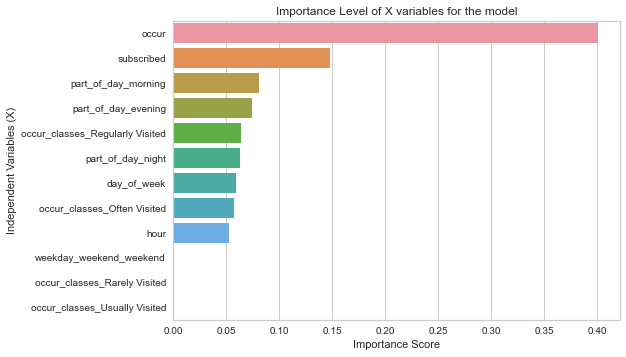

In [43]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance Score')
plt.ylabel('Independent Variables (X)')
plt.title("Importance Level of X variables for the model")
plt.show()

This shows that the 'occur' variable is an important variable for the model. Also the 'weekday_weekend_weekend', 'occur_classed_Rarely_visited', and 'occur_classes_Usually_Visited' don't have any importance for the model. 

The higher scores are usually kept and the lower scores are deleted as they are not important for the model. This not only makes the model simpler but also speeds up the model’s working, ultimately improving the performance of the model (Shin, 2022).

#### Learning Curve

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

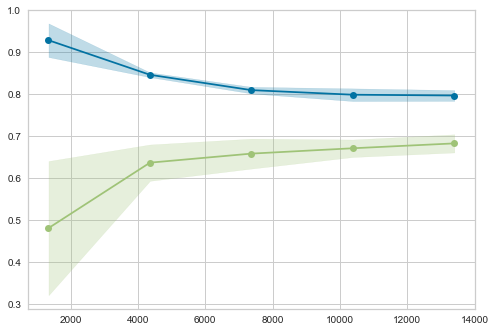

In [44]:
#https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html
visualizer = LearningCurve(
    xgb_tuned, cv=2, scoring='f1_weighted', n_jobs=-1, verbose=2)
visualizer.fit(X, y)

#Please scroll down do the learning curve. It given an error but it shows the curve. 

The blue line is the training score, and the green line is the cross validation score which used the train data. At first the model was overfitting (the green shadow goes from big to small), and after some instances of cross validation, the model had good (or better) fit training score (Brownlee, 2019). The X axis represents the training instances, so after 4000 instances, the test variability has a high score. The Y axis is the F1 score, which has the following formula $F1=Precision*Recall/(Precision+Recall)$ so its a metric that tests performace for both test and training data (Korstanje, 2022). 

The Learning Curve shows that the test and training score have not converged, therefore the model could benefit from more training data (YellowBrick, 2019).

#### Roc Curve 

ROC curve is a performance measurement tool for the classification problems (Narkhede, 2021). 

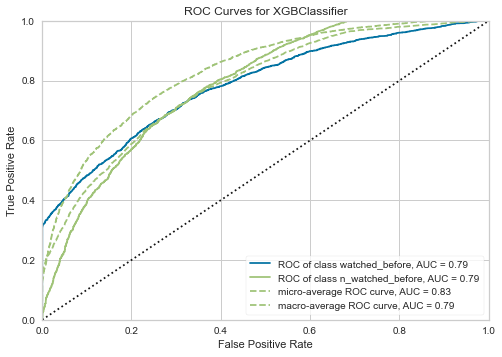

AttributeError: 'XGBClassifier' object has no attribute 'binary'

AttributeError: 'XGBClassifier' object has no attribute 'binary'

In [45]:
roc_auc(xgb_tuned, X_train, y_train, X_test=X_test, y_test=y_test, classes=['watched_before', 'n_watched_before'])

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve is one of the most important evaluation metrics for checking any classification model’s performance (Narkhede, 2021). 
'It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.' (Narkhede, 2021)

Therefore this model can distinguish between positive and negative classes with 79% performance.

## Conclusions

I think the model would have been better if I had more variables that correlated with each other. For example, having the platform variable, YouTube or YouTube Music.  The watching behaviour on each of those platform is different, at least in my case. 

The model is 74% precise in predicting if I would rewatch a video, and it would predict that for 91% of the videos. 
The model is 76% precise in predicting if I would watch a new video, and it would predict that only for 47% of the videos. Both platforms have an enormous amount of videos, so more training data could have lead to a better learning curve. 

## References

Adverbs of Frequency English Grammar - Adverbios de Frecuencia. (2022, January 1). Grammar. Retrieved January 27, 2022, from https://www.grammar.cl/Basic/Adverbs_Frequency.htm

Are Decision Trees Robust to Outliers. (2018, August 24). Data Science Stack Exchange. Retrieved January 27, 2022, from https://datascience.stackexchange.com/questions/37394/are-decision-trees-robust-to-outliers/37402

Brownlee, J. (2019, August 6). How to use Learning Curves to Diagnose Machine Learning Model Performance. Machine Learning Mastery. Retrieved January 28, 2022, from https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

Cooper, P. (2021, June 21). How Does the YouTube Algorithm Work in 2021? The Complete Guide. Social Media Marketing & Management Dashboard. Retrieved January 26, 2022, from https://blog.hootsuite.com/how-the-youtube-algorithm-works/

Korstanje, J. (2022, January 5). The F1 score | Towards Data Science. Medium. Retrieved January 28, 2022, from https://towardsdatascience.com/the-f1-score-bec2bbc38aa6

Learning Curve — Yellowbrick v1.3.post1 documentation. (2019). YellowBrick. Retrieved January 28, 2022, from https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html

Malik, F. (2021, December 13). What Is Grid Search? - FinTechExplained. Medium. Retrieved January 27, 2022, from https://medium.com/fintechexplained/what-is-grid-search-c01fe886ef0a

Narkhede, S. (2021, June 15). Understanding AUC - ROC Curve - Towards Data Science. Medium. Retrieved January 27, 2022, from https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Shin, T. (2022, January 1). Understanding Feature Importance and How to Implement it in Python. Medium. Retrieved January 27, 2022, from https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:%7E:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable

Smith, C. (2021, April 1). YouTube is testing a big user interface change – here’s what it looks like. BGR. Retrieved January 26, 2022, from https://bgr.com/tech/youtube-dislikes-count-hidden-ui-experiment/ 

Soydinç, F. (2022, January 17). Automated-Machine-Learning-Model-Select-/RMSE - R2 - Accuracy Calculater for different ML algorithm.ipynb at main · firatsoydinc/Automated-Machine-Learning-Model-Select-. GitHub. Retrieved January 26, 2022, from https://github.com/firatsoydinc/Automated-Machine-Learning-Model-Select-/blob/main/RMSE%20-%20R2%20-%20Accuracy%20Calculater%20for%20different%20ML%20algorithm.ipynb

T., B. (2022, January 7). Beginner’s Guide to XGBoost for Classification Problems | Towards Data Science. Medium. Retrieved January 28, 2022, from https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

Test accuracy higher than the training accuracy | Data Science and Machine Learning. (2021, January 1). Kaggle. Retrieved January 26, 2022, from https://www.kaggle.com/questions-and-answers/186681

XGBoost Parameters — xgboost 1.5.2 documentation. (2021). XGBoost. Retrieved January 27, 2022, from https://xgboost.readthedocs.io/en/stable/parameter.html